In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import openpyxl

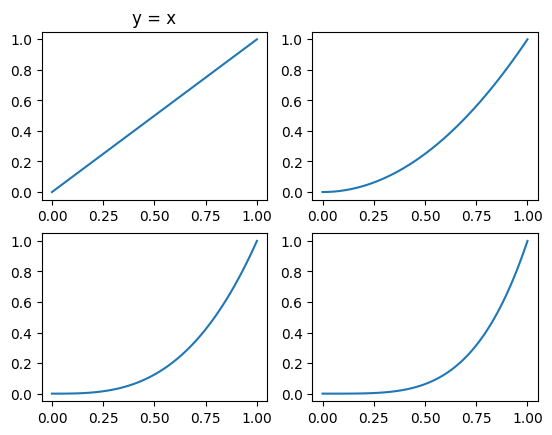

In [18]:
x_1 = np.linspace(0, 1, 100)
y_1 = x_1
x_2 = np.linspace(0, 1, 100)
y_2 = x_2 ** 2
x_3 = np.linspace(0, 1, 100)
y_3 = x_3 ** 3
x_4 = np.linspace(0, 1, 100)
y_4 = x_4 ** 4
fig = plt.figure()

ax_1 = fig.add_subplot(221)
ax_2 = fig.add_subplot(222)
ax_3 = fig.add_subplot(223)
ax_4 = fig.add_subplot(224)

ax_1.plot(x_1, y_1)
ax_1.set_title("y = x")  # タイトル追加
ax_2.plot(x_2, y_2)
ax_3.plot(x_3, y_3)
ax_4.plot(x_4, y_4)

plt.show()

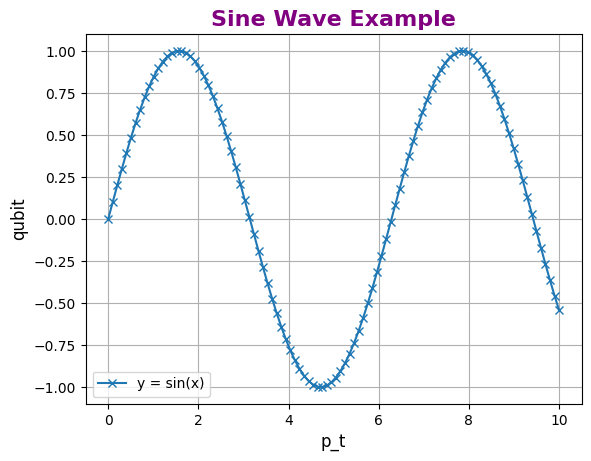

In [22]:
# データ作成
x = np.linspace(0, 10, 100)
y = np.sin(x)

# 折れ線グラフ
plt.plot(x, y, marker='x',label="y = sin(x)")

# タイトルの設定
plt.title("Sine Wave Example", fontsize=16, color="purple", fontweight="bold")

# 軸ラベルの設定
plt.xlabel("p_t", fontsize=12)
plt.ylabel("qubit", fontsize=12)

# 凡例とグリッド
plt.legend()
plt.grid(True)

# グラフの表示
plt.show()

In [82]:
df = pd.read_excel("/home/rest/forpyzx/excel/20241204output.xlsx",sheet_name='Sheet1',header=1)

#original,gates=1000,p_t=0.1,qubit=4を抽出
#print(df[(df["optimize_name"] == "original") & (df["gates_bef"] == 1000) & (df["p_t"] == 0.2) & (df["qubits"] == 4)])

/home/rest/forpyzx/venv/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Sparkline Group extension is not supported and will be removed
  warn(msg)


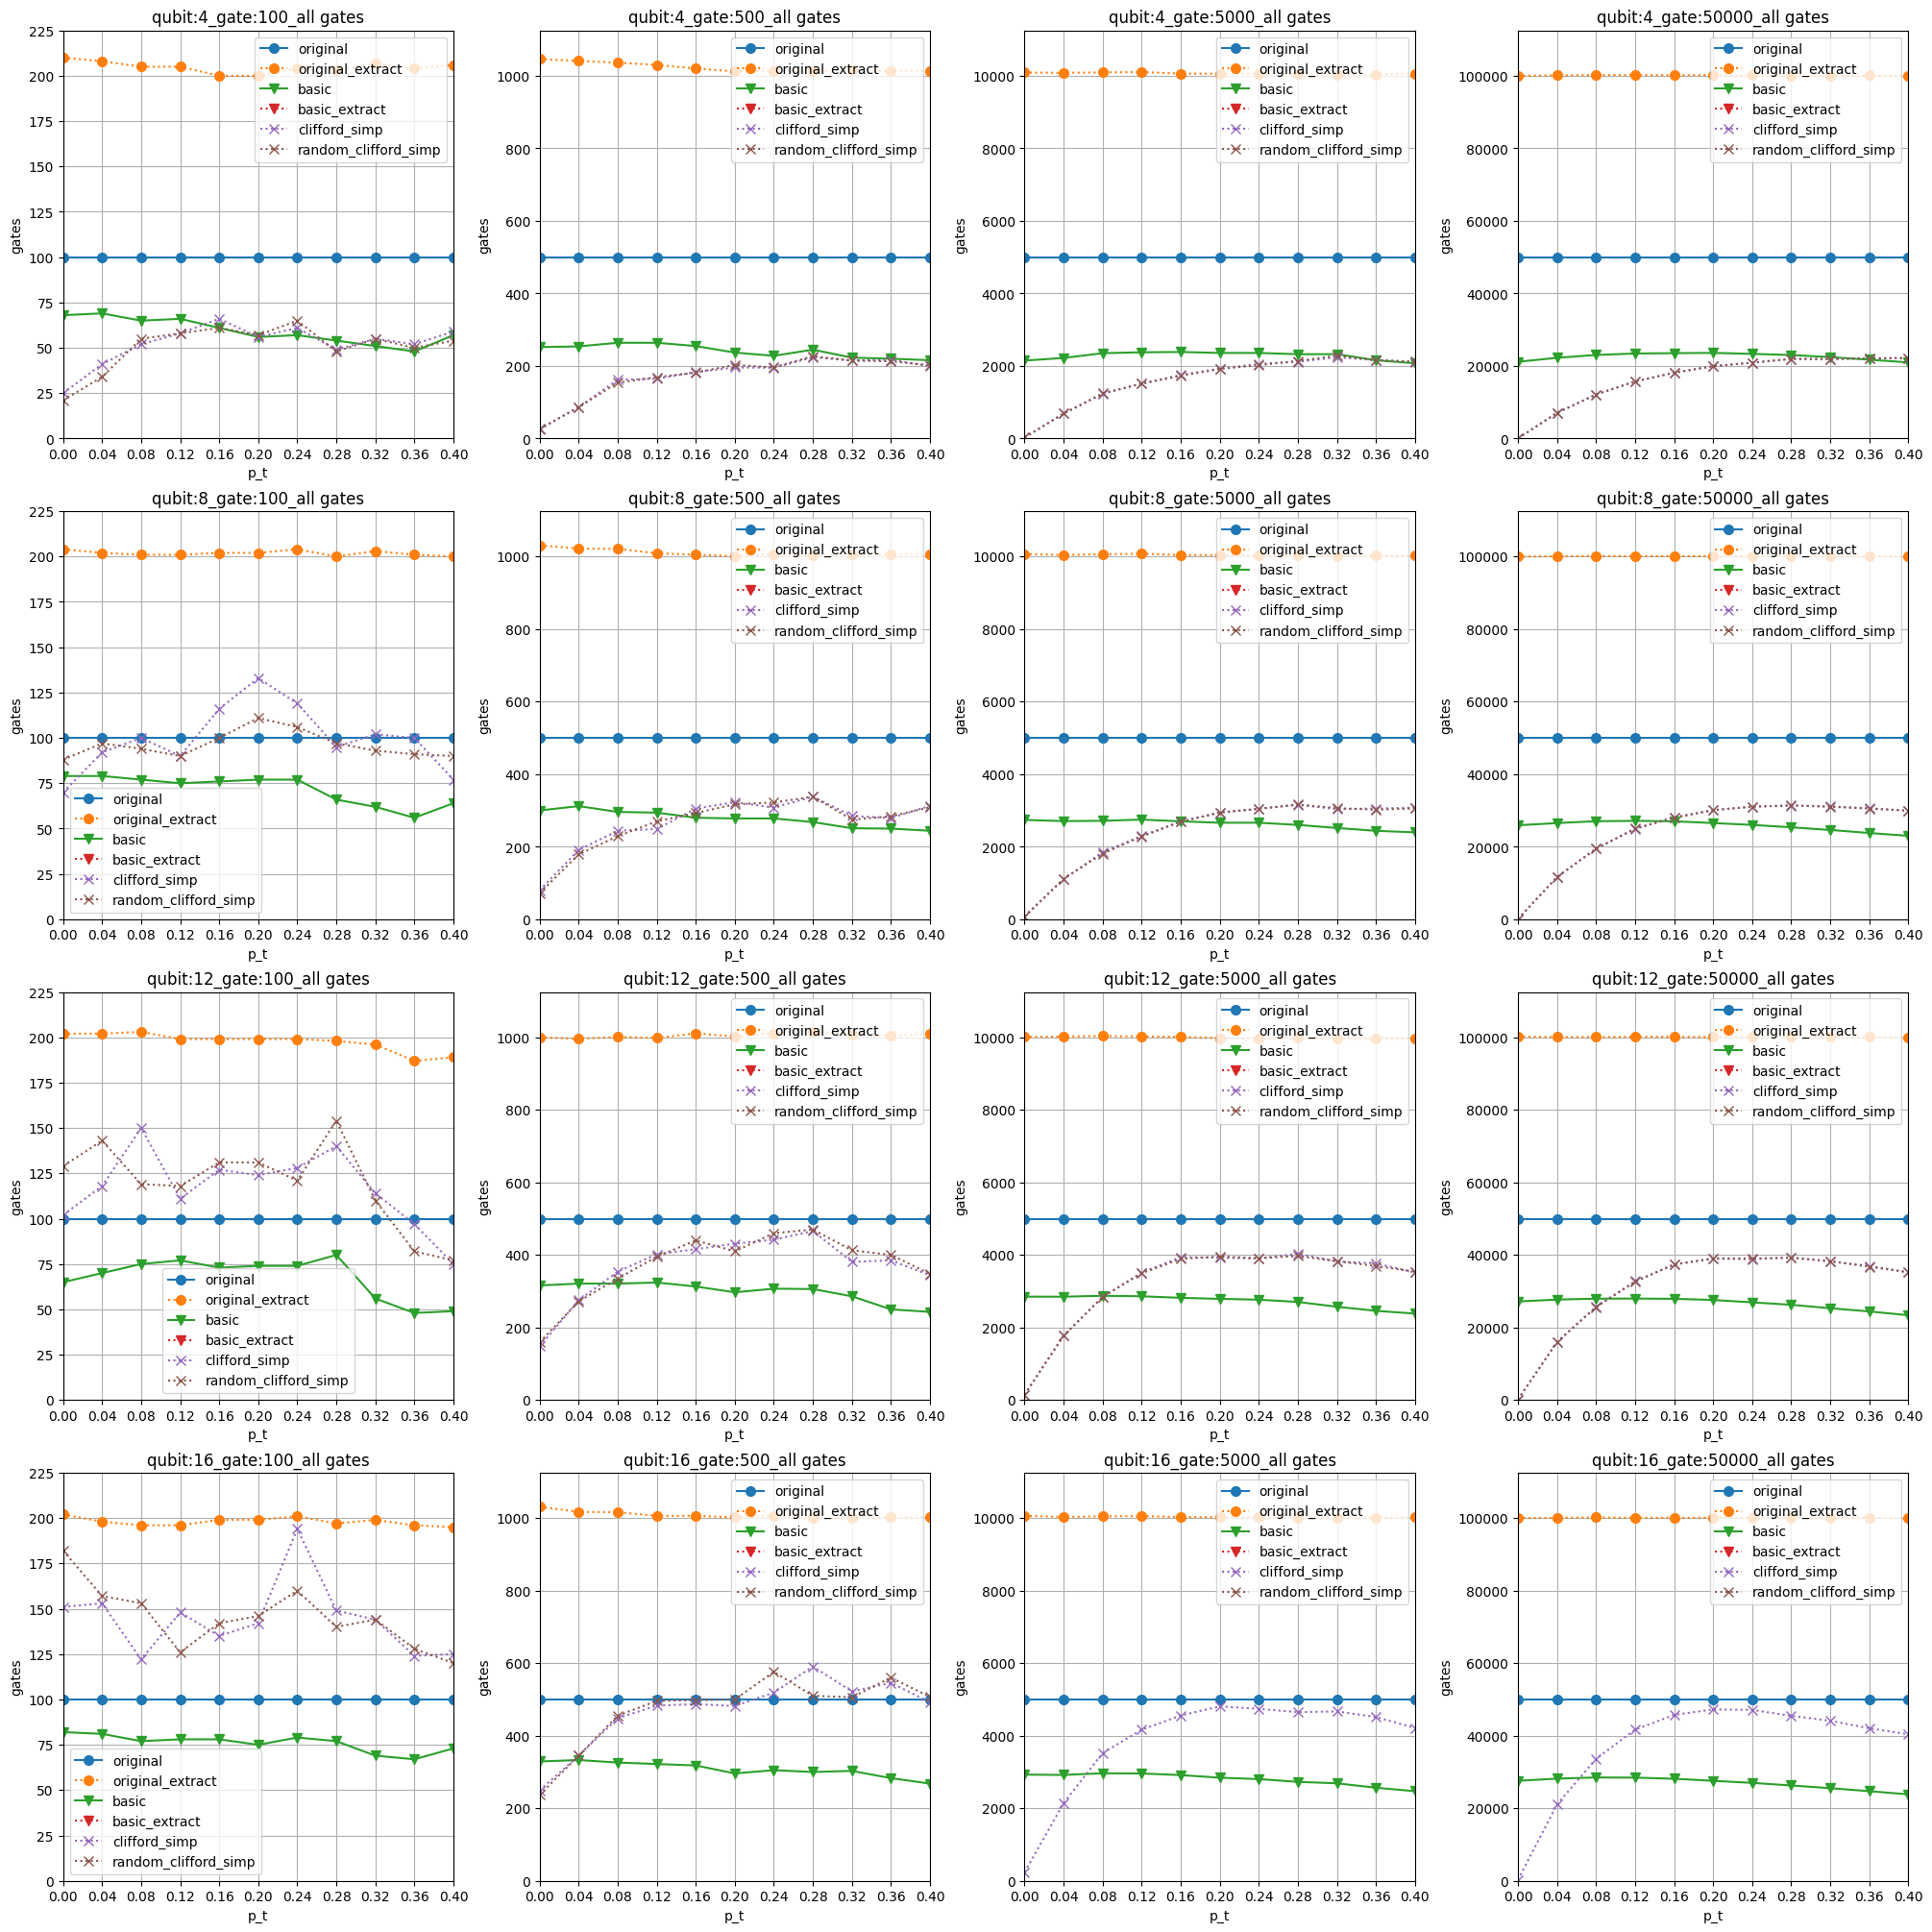

In [109]:
qubits = [4,8,12,16]
gates = [100,500,5000,50000]
p_t_lists = [i * 0.04 for i in range(0, 11)]
optimize_name = ["original","original_extract","basic","basic_extract","clifford_simp","random_clifford_simp"]

#fig,axes = plt.subplots(7,11)
fig, ax = plt.subplots(len(qubits), len(gates),figsize=(20, 20),constrained_layout=True)

#p_tを変化させた時のゲート数
for qubit in range(len(qubits)):
    for gate in range(len(gates)):
        ax[qubit][gate].set_title(f"qubit:{qubits[qubit]}_gate:{gates[gate]}_all gates")
        ax[qubit][gate].set_xlabel("p_t")
        ax[qubit][gate].set_ylabel("gates")
        ax[qubit][gate].set_xlim(min(p_t_lists),max(p_t_lists))
        ax[qubit][gate].set_xticks(p_t_lists)
        ax[qubit][gate].set_ylim(0,gates[gate]*2.25)
        ax[qubit][gate].grid(True)

        for optimize in optimize_name:
            data = df[(df["optimize_name"] == optimize) & (df["gates_bef"] == gates[gate]) & (df["qubits"] == qubits[qubit])]
            if optimize == "clifford_simp" or optimize == "random_clifford_simp":
                plot_style = 'x'
            elif optimize == "basic" or optimize == "basic_extract":
                plot_style = 'v'
            else: 
                plot_style = 'o'

            if optimize == "original_extract" or optimize == "basic_extract" or optimize == "clifford_simp" or optimize == "random_clifford_simp":
                ls = ':'
            else:
                ls = '-'
            ax[qubit][gate].plot(data["p_t"],data["gates_aft"],plot_style,linestyle=ls,markersize=7,label=optimize)
            ax[qubit, gate].legend()

plt.show()

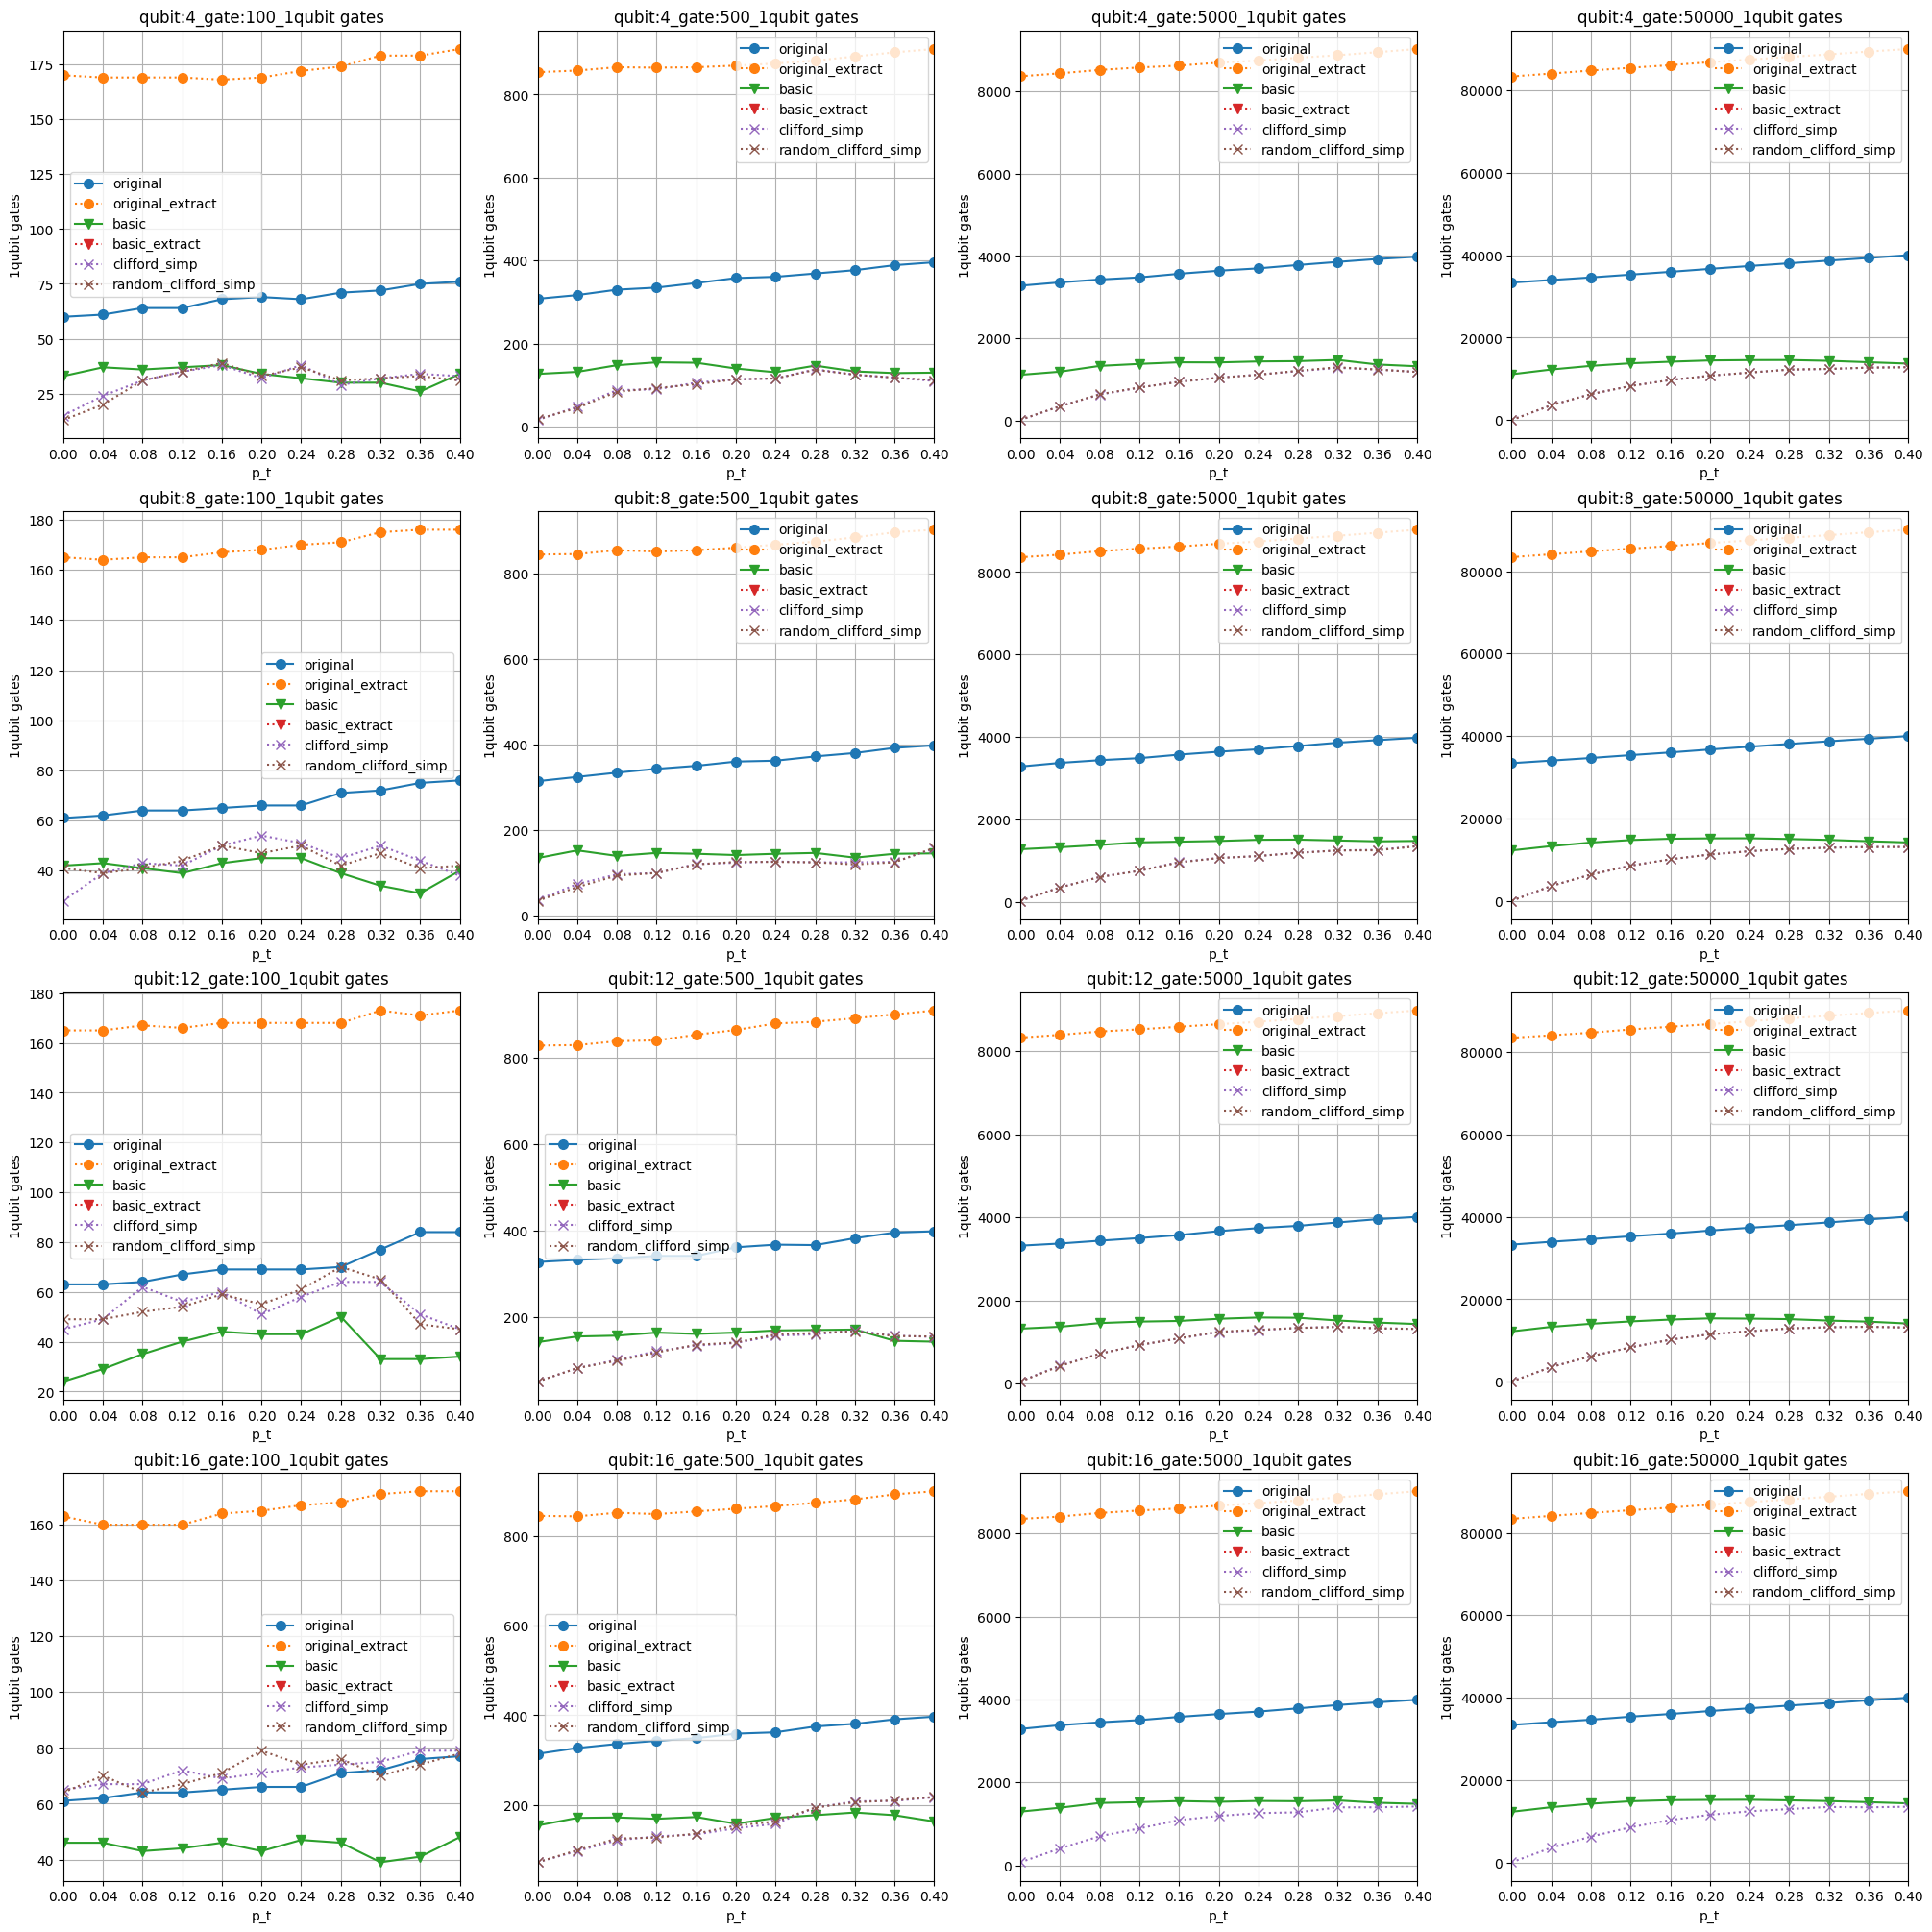

In [112]:
qubits = [4,8,12,16]
gates = [100,500,5000,50000]
p_t_lists = [i * 0.04 for i in range(0, 11)]
optimize_name = ["original","original_extract","basic","basic_extract","clifford_simp","random_clifford_simp"]

#fig,axes = plt.subplots(7,11)
fig, ax = plt.subplots(len(qubits), len(gates),figsize=(20, 20),constrained_layout=True)

#p_tを変化させた時のゲート数
for qubit in range(len(qubits)):
    for gate in range(len(gates)):
        ax[qubit][gate].set_title(f"qubit:{qubits[qubit]}_gate:{gates[gate]}_1qubit gates")
        ax[qubit][gate].set_xlabel("p_t")
        ax[qubit][gate].set_ylabel("1qubit gates")
        ax[qubit][gate].set_xlim(min(p_t_lists),max(p_t_lists))
        ax[qubit][gate].set_xticks(p_t_lists)
        #ax[qubit][gate].set_ylim(0,gates[gate]*2.25)
        ax[qubit][gate].grid(True)

        for optimize in optimize_name:
            data = df[(df["optimize_name"] == optimize) & (df["gates_bef"] == gates[gate]) & (df["qubits"] == qubits[qubit])]

            if optimize == "clifford_simp" or optimize == "random_clifford_simp":
                plot_style = 'x'
            elif optimize == "basic" or optimize == "basic_extract":
                plot_style = 'v'
            else: 
                plot_style = 'o'
            if optimize == "original_extract" or optimize == "basic_extract" or optimize == "clifford_simp" or optimize == "random_clifford_simp":
                ls = ':'
            else:
                ls = '-'

            ax[qubit][gate].plot(data["p_t"],data["1qubit_gate"],plot_style,linestyle=ls,markersize=7,label=optimize)
            ax[qubit, gate].legend()

plt.show()

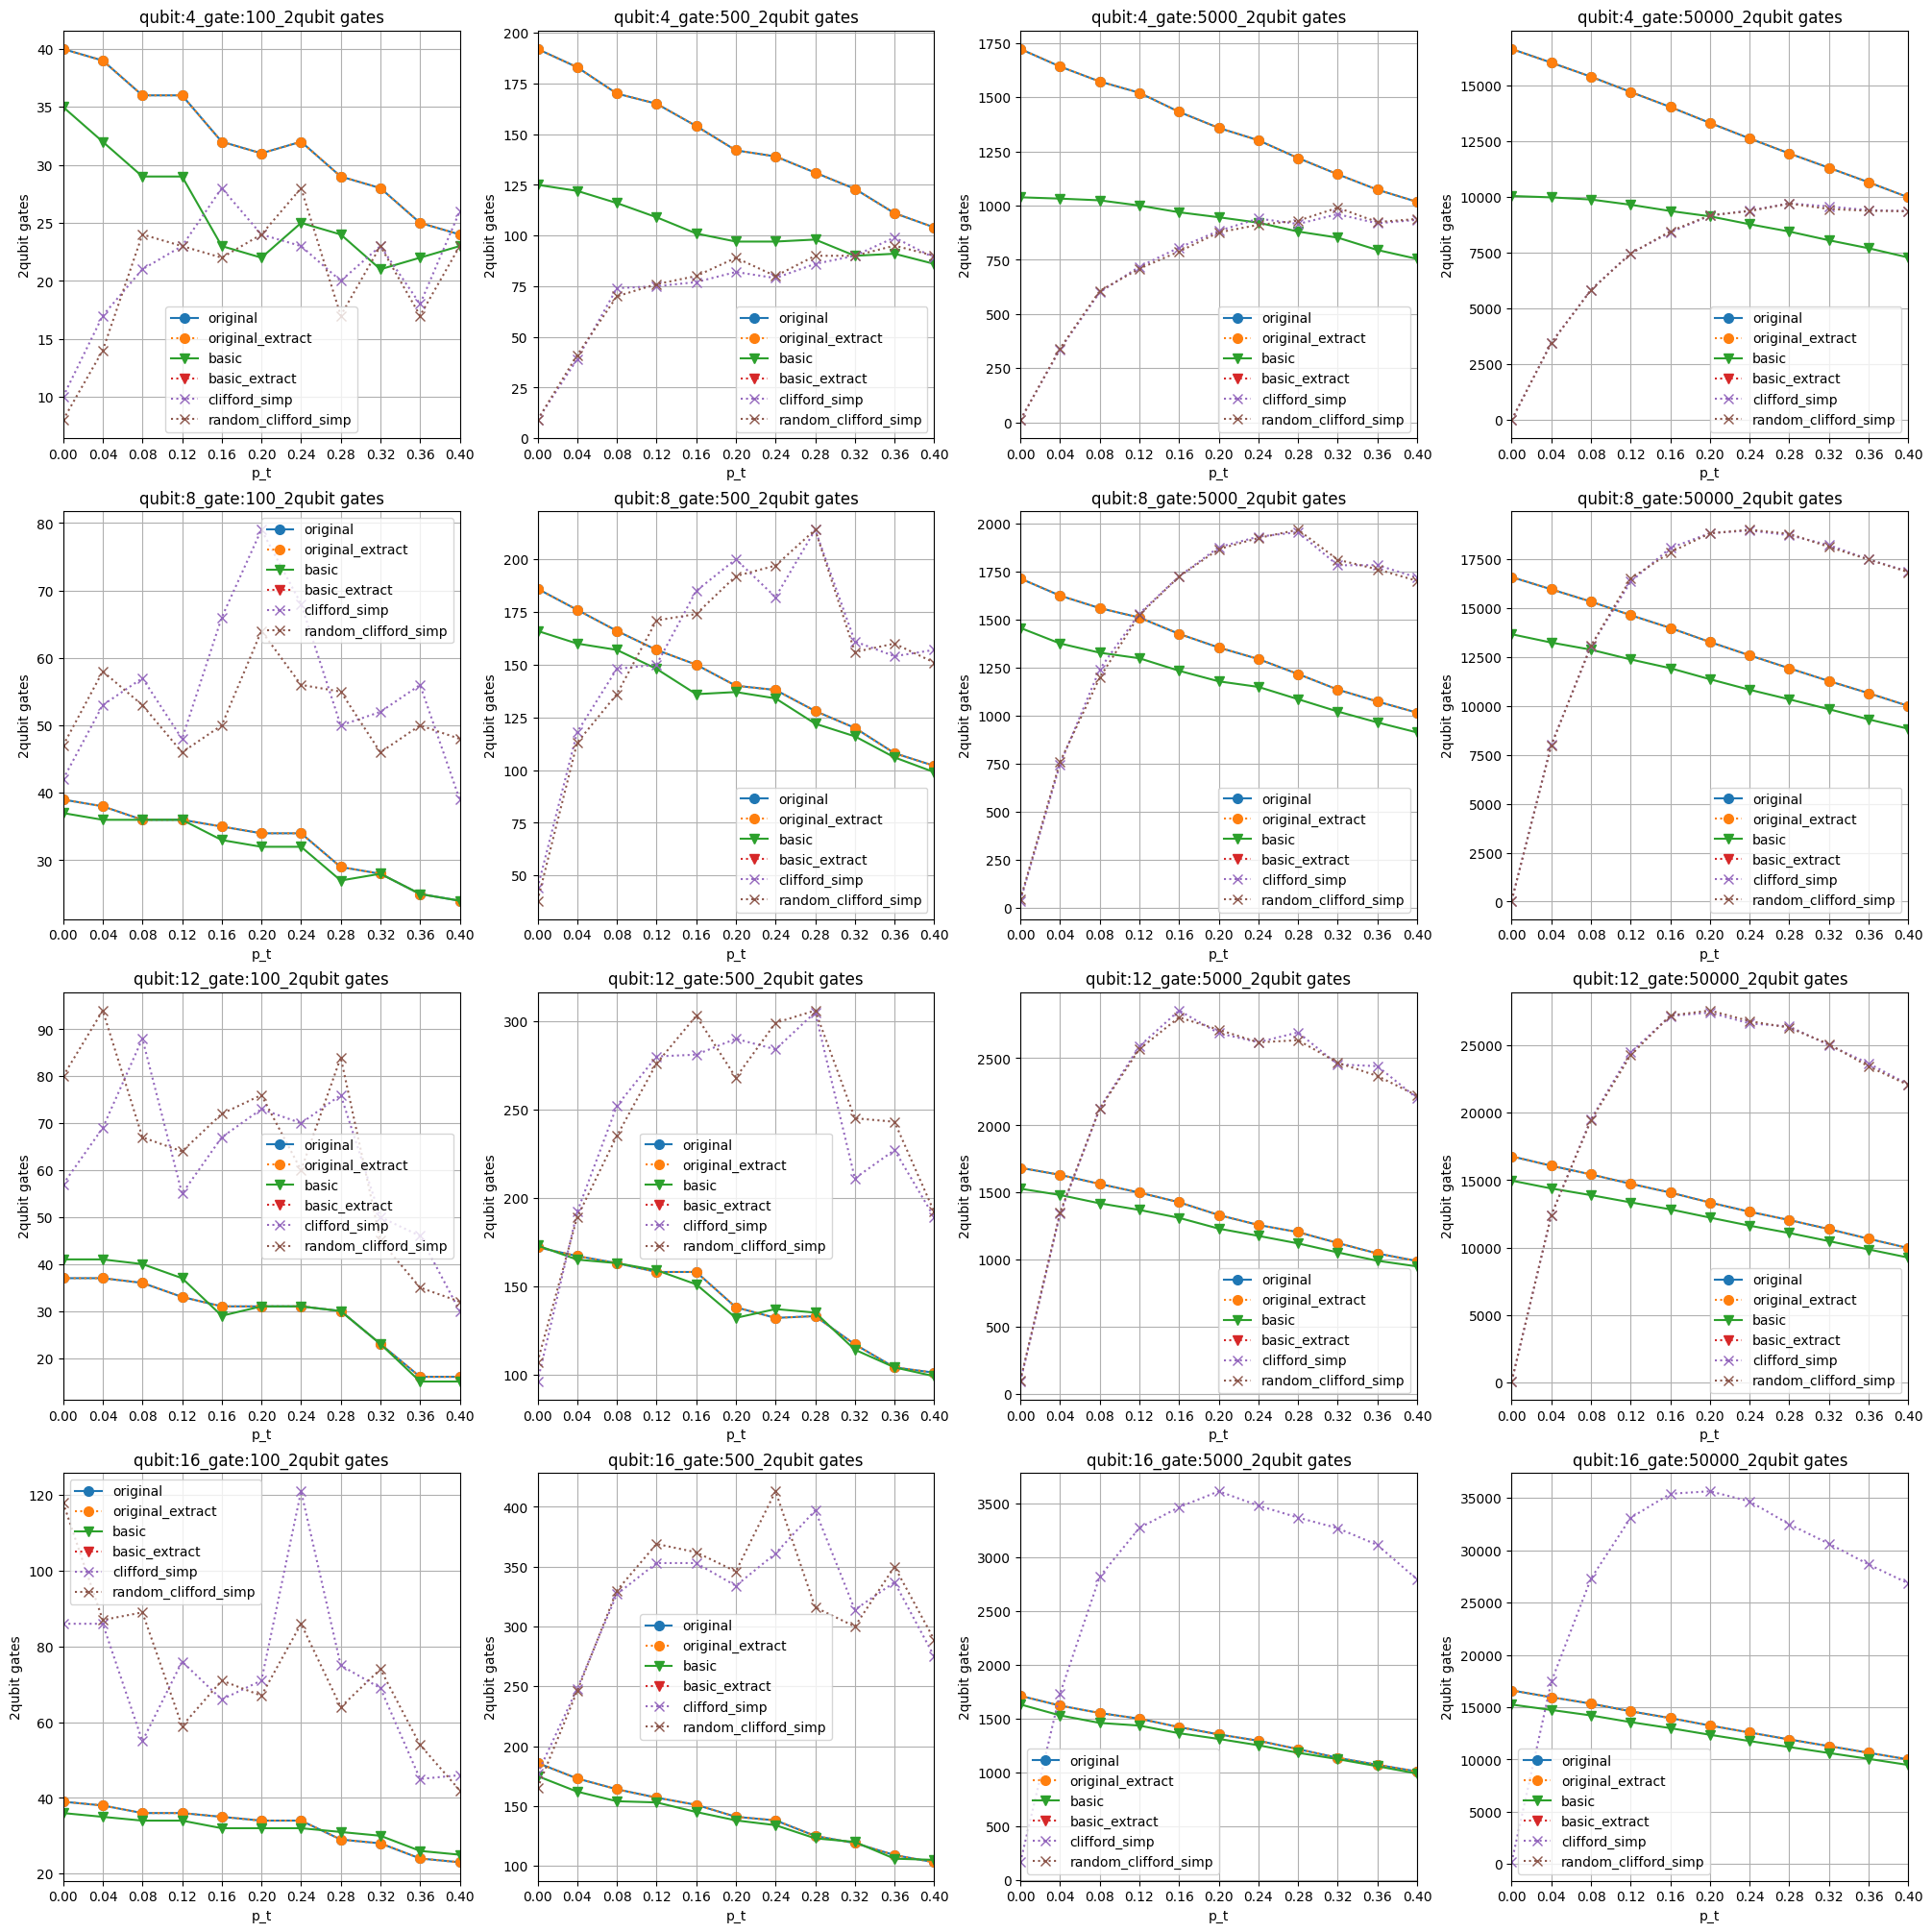

In [ ]:
qubits = [4,8,12,16]
gates = [100,500,5000,50000]
p_t_lists = [i * 0.04 for i in range(0, 11)]
optimize_name = ["original","original_extract","basic","basic_extract","clifford_simp","random_clifford_simp"]

#fig,axes = plt.subplots(7,11)
fig, ax = plt.subplots(len(qubits), len(gates),figsize=(20, 20),constrained_layout=True)

#p_tを変化させた時のゲート数
for qubit in range(len(qubits)):
    for gate in range(len(gates)):
        ax[qubit][gate].set_title(f"qubit:{qubits[qubit]}_gate:{gates[gate]}_2qubit gates")
        ax[qubit][gate].set_xlabel("p_t")
        ax[qubit][gate].set_ylabel("2qubitgates")
        ax[qubit][gate].set_xlim(min(p_t_lists),max(p_t_lists))
        ax[qubit][gate].set_xticks(p_t_lists)
        #ax[qubit][gate].set_ylim(0,gates[gate]*2.25)
        ax[qubit][gate].grid(True)

        for optimize in optimize_name:
            data = df[(df["optimize_name"] == optimize) & (df["gates_bef"] == gates[gate]) & (df["qubits"] == qubits[qubit])]

            if optimize == "clifford_simp" or optimize == "random_clifford_simp":
                plot_style = 'x'
            elif optimize == "basic" or optimize == "basic_extract":
                plot_style = 'v'
            else: 
                plot_style = 'o'
            if optimize == "original_extract" or optimize == "basic_extract" or optimize == "clifford_simp" or optimize == "random_clifford_simp":
                ls = ':'
            else:
                ls = '-'

            ax[qubit][gate].plot(data["p_t"],data["2qubit_gate"],plot_style,linestyle=ls,markersize=7,label=optimize)
            ax[qubit, gate].legend()

plt.show()

In [ ]:
qubits = [4,8,12,16]
gates = [100,500,1000,2000,5000,10000,50000,100000]
p_t_lists = [i * 0.04 for i in range(0, 11)]
for_plot_p_t_lists = [0.00 , 0.12,0.28,0.40]
optimize_name = ["original","original_extract","basic","basic_extract","clifford_simp","random_clifford_simp"]

#fig,axes = plt.subplots(7,11)
fig, ax = plt.subplots(len(qubits), len(gates),figsize=(20, 20),constrained_layout=True)

#p_tを変化させた時のゲート数
for qubit in range(len(qubits)):
    for gate in range(len(for_plot_p_t_lists)):
        ax[qubit][gate].set_title(f"qubit:{qubits[qubit]}_gate:{gates[gate]}_1qubit gates")
        ax[qubit][gate].set_xlabel("p_t")
        ax[qubit][gate].set_ylabel("1qubit gates")
        ax[qubit][gate].set_xlim(min(p_t_lists),max(p_t_lists))
        ax[qubit][gate].set_xticks(p_t_lists)
        #ax[qubit][gate].set_ylim(0,gates[gate]*2.25)
        ax[qubit][gate].grid(True)

        for optimize in optimize_name:
            data = df[(df["optimize_name"] == optimize) & (df["gates_bef"] == gates[gate]) & (df["qubits"] == qubits[qubit])]

            if optimize == "clifford_simp" or optimize == "random_clifford_simp":
                plot_style = 'x'
            elif optimize == "basic" or optimize == "basic_extract":
                plot_style = 'v'
            else: 
                plot_style = 'o'
            if optimize == "original_extract" or optimize == "basic_extract" or optimize == "clifford_simp" or optimize == "random_clifford_simp":
                ls = ':'
            else:
                ls = '-'

            ax[qubit][gate].plot(data["p_t"],data["1qubit_gate"],plot_style,linestyle=ls,markersize=7,label=optimize)
            ax[qubit, gate].legend()

plt.show()

22    0.00
23    0.04
24    0.08
25    0.12
26    0.16
27    0.20
28    0.24
29    0.28
30    0.32
31    0.36
32    0.40
Name: p_t, dtype: float64


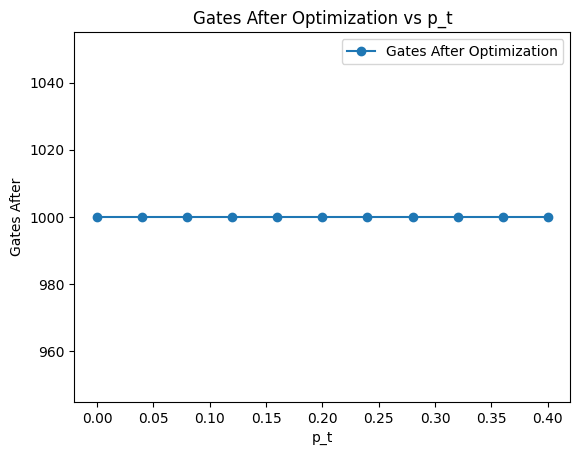

In [76]:
data = df[(df["optimize_name"] == "original") & (df["gates_aft"] == 1000) & (df["qubits"] == 4)]


p_t = df["p_t"]
gates_aft = df["gates_aft"]
print(p_t)

plt.plot(p_t, gates_aft, label="Gates After Optimization", marker='o')

# グラフの設定
plt.title("Gates After Optimization vs p_t")
plt.xlabel("p_t")
plt.ylabel("Gates After")
plt.legend()

# グラフを表示
plt.show()
